<a href="https://colab.research.google.com/github/Tilak-Shenoy/IE517/blob/main/IE517_F20_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
# Upload file from the system. We are using Treasury Squeeze dataset in this case
from google.colab import files
data_to_load = files.upload()

Saving Treasury Squeeze raw score data.csv to Treasury Squeeze raw score data.csv


In [5]:
#Save the data into a dataframe
df = pd.read_csv('Treasury Squeeze raw score data.csv')

In [ ]:
df.head()

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [6]:
#Slicing the dataframe to form X and y
X = df.iloc[:,2:11]
y = df.iloc[:,-1:]

In [7]:
# Splitting the data into training and test set with 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33, stratify=y)

In [8]:
X_train.shape

(720, 9)

In [ ]:
# Run KNN with different values of K. 
# Assuming that we find the optimal value of K as the sqrt(train_size) we run it until the value of k is sqrt(train_size) + 10
accuracy = []
for k in range(5, 720, 5):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_pred, y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

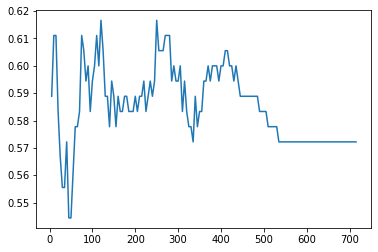

In [ ]:
#Plotting the graph of value of k vs accuracy
k_values = list(range(5, 720, 5))
plt.plot(k_values, accuracy)
plt.show()

Looking at the graph, it's clear that the optimal value is within 100. Next, we zoom into the graph to find a better result

In [ ]:
# Filter first 20 accuracy (k < 100)
accuracy100 = accuracy[:20]
k = list(range(0,100,5))

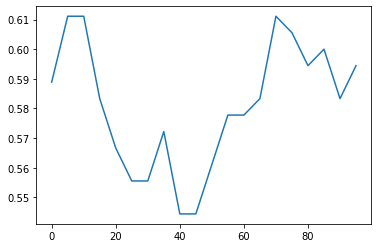

In [ ]:
plt.plot(k,accuracy100)

In [41]:
# Building decision tree
dt_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=4, random_state = 1)
dt_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [42]:
# Run the tree against test dataset
y_pred = dt_tree.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.6000


[Text(0.4732142857142857, 0.9, 'X[8] <= 0.193\ngini = 0.489\nsamples = 720\nvalue = [413, 307]'),
 Text(0.23214285714285715, 0.7, 'X[0] <= 0.635\ngini = 0.411\nsamples = 363\nvalue = [258, 105]'),
 Text(0.14285714285714285, 0.5, 'X[1] <= 0.564\ngini = 0.313\nsamples = 196\nvalue = [158, 38]'),
 Text(0.07142857142857142, 0.3, 'X[0] <= 0.003\ngini = 0.159\nsamples = 103\nvalue = [94, 9]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.13\nsamples = 100\nvalue = [93, 7]'),
 Text(0.21428571428571427, 0.3, 'X[2] <= 0.07\ngini = 0.429\nsamples = 93\nvalue = [64, 29]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.1, 'gini = 0.39\nsamples = 83\nvalue = [61, 22]'),
 Text(0.32142857142857145, 0.5, 'X[0] <= 0.66\ngini = 0.48\nsamples = 167\nvalue = [100, 67]'),
 Text(0.2857142857142857, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.35714285714285715, 0.3, 'X[7] <= 0

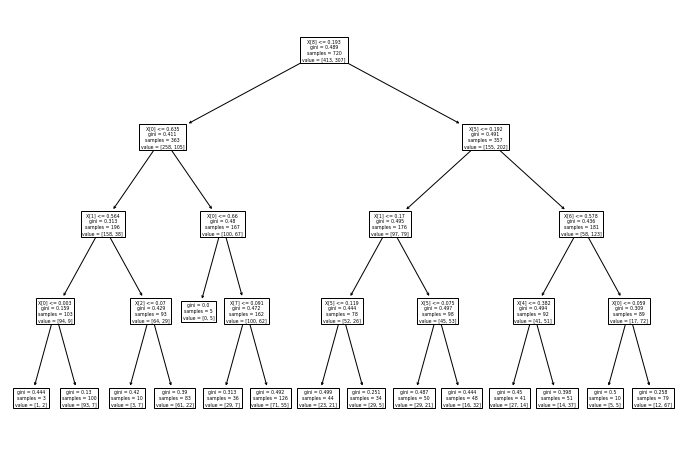

In [43]:
# Visualizing the decision tree
plt.figure(figsize=(12,8))

tree.plot_tree(dt_tree.fit(X_train, y_train)) 

In [38]:
# Building the decision tree with entropy
dt_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state = 1)
dt_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [39]:
y_pred = dt_tree.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.6278


[Text(0.4791666666666667, 0.9, 'X[8] <= 0.193\nentropy = 0.984\nsamples = 720\nvalue = [413, 307]'),
 Text(0.2708333333333333, 0.7, 'X[0] <= 0.635\nentropy = 0.868\nsamples = 363\nvalue = [258, 105]'),
 Text(0.16666666666666666, 0.5, 'X[1] <= 0.564\nentropy = 0.71\nsamples = 196\nvalue = [158, 38]'),
 Text(0.08333333333333333, 0.3, 'X[7] <= 0.634\nentropy = 0.428\nsamples = 103\nvalue = [94, 9]'),
 Text(0.041666666666666664, 0.1, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0]'),
 Text(0.125, 0.1, 'entropy = 0.586\nsamples = 64\nvalue = [55, 9]'),
 Text(0.25, 0.3, 'X[2] <= 0.07\nentropy = 0.895\nsamples = 93\nvalue = [64, 29]'),
 Text(0.20833333333333334, 0.1, 'entropy = 0.881\nsamples = 10\nvalue = [3, 7]'),
 Text(0.2916666666666667, 0.1, 'entropy = 0.834\nsamples = 83\nvalue = [61, 22]'),
 Text(0.375, 0.5, 'X[0] <= 0.66\nentropy = 0.972\nsamples = 167\nvalue = [100, 67]'),
 Text(0.3333333333333333, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.4166666666666667, 0.3, 'X[7]

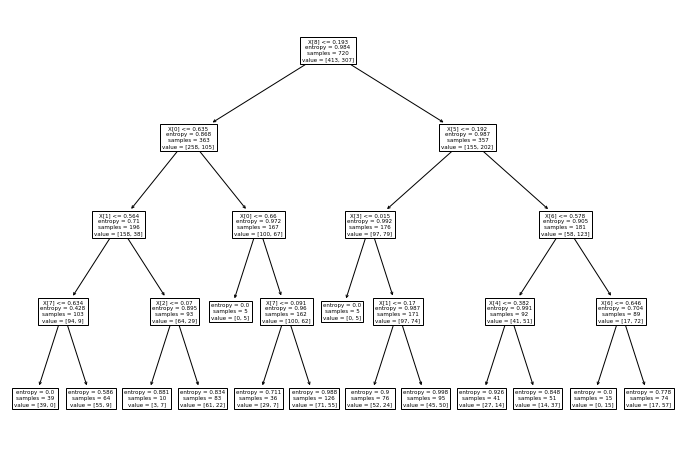

In [40]:
#Visualizing the tree
plt.figure(figsize=(12,8))

tree.plot_tree(dt_tree.fit(X_train, y_train)) 

In [33]:
print("My name is Tilak Shenoy")
print("My NetID is: tshenoy2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Tilak Shenoy
My NetID is: tshenoy2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
